Run all the cells and make changes to only the allowed cells. Do not change the code in the restricted region

In [5]:
%pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import shutil

dataset_path = "/Users/hemantaggarwal/Downloads/Pest/Dataset"
crops = ['Cashew', 'Cassava', 'Maize', 'Tomato']
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def restructure_dataset():
    for crop in crops:
        crop_dir = os.path.join(dataset_path, crop)
        for data_split in ['train_set', 'test_set']:
            split_path = os.path.join(crop_dir, data_split)
            if not os.path.exists(split_path):
                print(f"Path not found: {split_path}")
                continue

            for category in os.listdir(split_path):
                category_path = os.path.join(split_path, category)
                if os.path.isdir(category_path):
                    # Append crop name to the category to make it unique
                    new_name = f"{category.replace(' ', '_')}_{crop.lower()}"
                    target_dir = train_dir if 'train' in data_split else test_dir
                    # Move the category folder to the respective train/test directory
                    shutil.move(category_path, os.path.join(target_dir, new_name))

# Run the restructuring
restructure_dataset()
print("Dataset restructuring completed!")

# Verify the directory structure
print("Train Directory Contents:", os.listdir(train_dir))
print("Test Directory Contents:", os.listdir(test_dir))

Dataset restructuring completed!
Train Directory Contents: ['leaf_beetle_maize', 'gumosis_cashew', 'healthy_maize', 'bacterial_blight_cassava', 'anthracnose_cashew', 'green_mite_cassava', 'streak_virus_maize', 'brown_spot_cassava', 'grasshoper_maize', 'leaf_spot_maize', 'healthy_cassava', 'verticulium_wilt_tomato', 'septoria_leaf_spot_tomato', 'red_rust_cashew', 'healthy_tomato', 'leaf_miner_cashew', 'healthy_cashew', 'leaf_blight_maize', 'fall_armyworm_maize', 'mosaic_cassava', 'leaf_blight_tomato', 'leaf_curl_tomato']
Test Directory Contents: ['leaf_beetle_maize', 'gumosis_cashew', 'healthy_maize', 'bacterial_blight_cassava', 'anthracnose_cashew', 'green_mite_cassava', 'streak_virus_maize', 'brown_spot_cassava', 'grasshoper_maize', 'leaf_spot_maize', 'healthy_cassava', 'verticulium_wilt_tomato', 'septoria_leaf_spot_tomato', 'red_rust_cashew', 'healthy_tomato', 'leaf_miner_cashew', 'healthy_cashew', 'leaf_blight_maize', 'fall_armyworm_maize', 'mosaic_cassava', 'leaf_blight_tomato', 'l

In [9]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

# Do not change this code

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial_blight_cassava': 1, 'brown_spot_cassava': 2, 'fall_armyworm_maize': 3, 'grasshoper_maize': 4, 'green_mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_tomato': 10, 'leaf_beetle_maize': 11, 'leaf_blight_maize': 12, 'leaf_blight_tomato': 13, 'leaf_curl_tomato': 14, 'leaf_miner_cashew': 15, 'leaf_spot_maize': 16, 'mosaic_cassava': 17, 'red_rust_cashew': 18, 'septoria_leaf_spot_tomato': 19, 'streak_virus_maize': 20, 'verticulium_wilt_tomato': 21}


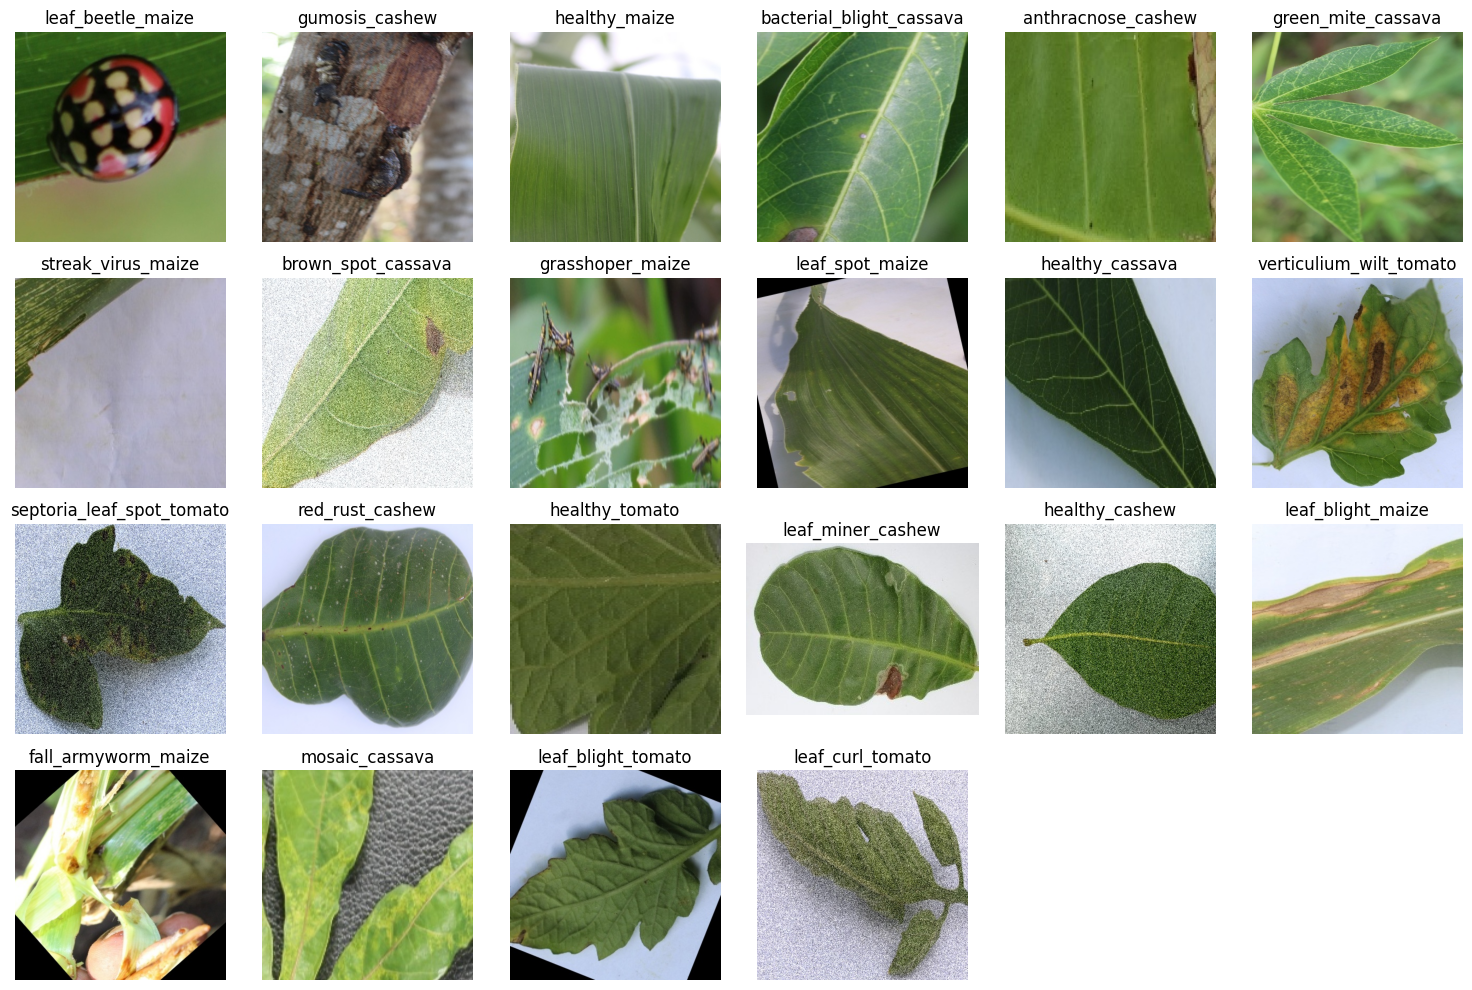

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the dataset
train_dir = "/Users/hemantaggarwal/Downloads/Pest/Dataset/train"

# Dictionary to store a single image path for each class
class_images = {}

# Loop through the directory structure to collect one image per class
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    
    if os.path.isdir(class_path):  # Ensure it's a directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_path.endswith(('.JPG')):  # Check for valid image extensions
                class_images[class_name] = image_path
                break  # Stop after finding one image for the class

# Display one image per class
plt.figure(figsize=(15, 10))
for idx, (class_name, image_path) in enumerate(class_images.items()):
    image = cv2.imread(image_path)  # Read image using OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    plt.subplot(4, 6, idx + 1)  # Adjust grid size as per number of classes
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()